In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
!ls dataSets/training

links (table 3).csv                volume(table 6)_training.csv
routes (table 4).csv               weather (table 7)_training.csv
trajectories(table 5)_training.csv


In [169]:
training_path1 = "dataSets/training/"
links = pd.read_csv(training_path1+'links (table 3).csv')
volume = pd.read_csv(training_path1+'volume(table 6)_training.csv')
routes = pd.read_csv(training_path1+'routes (table 4).csv')
weather = pd.read_csv(training_path1+'weather (table 7)_training.csv')
trajectories = pd.read_csv(training_path1+'trajectories(table 5)_training.csv')

In [39]:
training_path1 = "dataSets/training/"
links = pd.read_csv(training_path1+'links (table 3).csv')
print(links.shape)
print(links.info())
links.head()

(24, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
link_id       24 non-null int64
length        24 non-null int64
width         24 non-null int64
lanes         24 non-null int64
in_top        21 non-null object
out_top       21 non-null object
lane_width    24 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.4+ KB
None


,link_id,length,width,lanes,in_top,out_top,lane_width
0,100,58,3,1,105,111,3
1,101,84,3,1,116,121,3
2,102,131,9,3,115,109,3
3,103,23,12,4,111,"122,116",3
4,104,293,9,3,109,112,3


In [40]:
my_dict = {i:(str(i)+'s', str(i)+'e') for i in links['link_id']}
my_dict.items()

dict_items([(100, ('100s', '100e')), (101, ('101s', '101e')), (102, ('102s', '102e')), (103, ('103s', '103e')), (104, ('104s', '104e')), (105, ('105s', '105e')), (106, ('106s', '106e')), (107, ('107s', '107e')), (108, ('108s', '108e')), (109, ('109s', '109e')), (110, ('110s', '110e')), (111, ('111s', '111e')), (112, ('112s', '112e')), (113, ('113s', '113e')), (114, ('114s', '114e')), (115, ('115s', '115e')), (116, ('116s', '116e')), (117, ('117s', '117e')), (118, ('118s', '118e')), (119, ('119s', '119e')), (120, ('120s', '120e')), (121, ('121s', '121e')), (122, ('122s', '122e')), (123, ('123s', '123e'))])

In [41]:
links['link_id'] = [my_dict.get(i) for i in links['link_id']] 

In [42]:
links.head()

,link_id,length,width,lanes,in_top,out_top,lane_width
0,"(100s, 100e)",58,3,1,105,111,3
1,"(101s, 101e)",84,3,1,116,121,3
2,"(102s, 102e)",131,9,3,115,109,3
3,"(103s, 103e)",23,12,4,111,"122,116",3
4,"(104s, 104e)",293,9,3,109,112,3


In [43]:
routes = pd.read_csv(training_path1+'routes (table 4).csv')
print(routes.shape)
print(routes.info())
routes

(6, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
intersection_id    6 non-null object
tollgate_id        6 non-null int64
link_seq           6 non-null object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes
None


,intersection_id,tollgate_id,link_seq
0,A,2,"110,123,107,108,120,117"
1,A,3,"110,123,107,108,119,114,118,122"
2,B,1,"105,100,111,103,116,101,121,106,113"
3,B,3,"105,100,111,103,122"
4,C,1,"115,102,109,104,112,111,103,116,101,121,106,113"
5,C,3,"115,102,109,104,112,111,103,122"


In [44]:
# Make tollgate_id string to simplify processing later

routes['tollgate_id'] = routes.tollgate_id.astype(str)

In [45]:
for i in range(len(routes['link_seq'])):
    routes['link_seq'][i] = routes['link_seq'][i].split(',')

In [46]:
routes

,intersection_id,tollgate_id,link_seq
0,A,2,"[110, 123, 107, 108, 120, 117]"
1,A,3,"[110, 123, 107, 108, 119, 114, 118, 122]"
2,B,1,"[105, 100, 111, 103, 116, 101, 121, 106, 113]"
3,B,3,"[105, 100, 111, 103, 122]"
4,C,1,"[115, 102, 109, 104, 112, 111, 103, 116, 101, ..."
5,C,3,"[115, 102, 109, 104, 112, 111, 103, 122]"


In [47]:
e_or_s = {0:'s', 1:'e'}
arr_list = []
for i in range(len(routes['link_seq'])):
    arr_list.append(['arr_' + str(i)])

for i,j in enumerate(routes['link_seq']):
    arr_list[i] = []
    for idx in range(len(j)):
        arr_list[i].append(j[idx]+ 's')
        arr_list[i].append(j[idx]+ 'e')
        
for i in range(len(routes['link_seq'])):
    routes['link_seq'][i] = arr_list[i]

routes

In [50]:
link_seq2 = []
for i, row in routes.iterrows():
    new_seq = [row[0]] + row[2] + [row[1]]
    link_seq2.append(new_seq)
    
routes['link_seq'] = link_seq2
routes

,intersection_id,tollgate_id,link_seq
0,A,2,"[A, 110s, 110e, 123s, 123e, 107s, 107e, 108s, ..."
1,A,3,"[A, 110s, 110e, 123s, 123e, 107s, 107e, 108s, ..."
2,B,1,"[B, 105s, 105e, 100s, 100e, 111s, 111e, 103s, ..."
3,B,3,"[B, 105s, 105e, 100s, 100e, 111s, 111e, 103s, ..."
4,C,1,"[C, 115s, 115e, 102s, 102e, 109s, 109e, 104s, ..."
5,C,3,"[C, 115s, 115e, 102s, 102e, 109s, 109e, 104s, ..."


In [59]:
def bubble(link_seq):
    new_seq = []
    for i in np.arange(0, len(link_seq), 2):
        new_str = '_'.join((link_seq[i],link_seq[i+1]))
        new_seq.append(new_str)
    return new_seq

routes['link_seq']= routes.link_seq.apply(lambda x: bubble(x))
routes     

,intersection_id,tollgate_id,link_seq
0,A,2,"[A_110s, 110e_123s, 123e_107s, 107e_108s, 108e..."
1,A,3,"[A_110s, 110e_123s, 123e_107s, 107e_108s, 108e..."
2,B,1,"[B_105s, 105e_100s, 100e_111s, 111e_103s, 103e..."
3,B,3,"[B_105s, 105e_100s, 100e_111s, 111e_103s, 103e..."
4,C,1,"[C_115s, 115e_102s, 102e_109s, 109e_104s, 104e..."
5,C,3,"[C_115s, 115e_102s, 102e_109s, 109e_104s, 104e..."


In [150]:

directions = routes.link_seq.apply(lambda x: [[x[i], x[i+1]] 
                                   for i in range(len(x)-1)])
directions = directions.sum()
link = pd.DataFrame(directions, columns = ['curr', 'next'])
print(link.shape)
link.head()

(48, 2)


,curr,next
0,A_110s,110e_123s
1,110e_123s,123e_107s
2,123e_107s,107e_108s
3,107e_108s,108e_120s
4,108e_120s,120e_117s


In [145]:
nodes = set(link.curr).union(set(link.next))

In [163]:
start_nodes = set(routes.link_seq.apply(lambda x: x[0]))
end_nodes = set(routes.link_seq.apply(lambda x: x[-1]))
other_nodes = nodes - (start_nodes.union(end_nodes))
print(start_nodes)
print(end_nodes)
print(len(other_nodes))

{'C_115s', 'B_105s', 'A_110s'}
{'122e_3', '113e_1', '117e_2'}
23


In [148]:
import networkx as nx 

Links = nx.DiGraph()
Links.add_nodes_from(nodes)
# G.add_edges_from(seq_dict)
for i in link.index:
    Links.add_edge(link.curr[i],link.next[i]) 

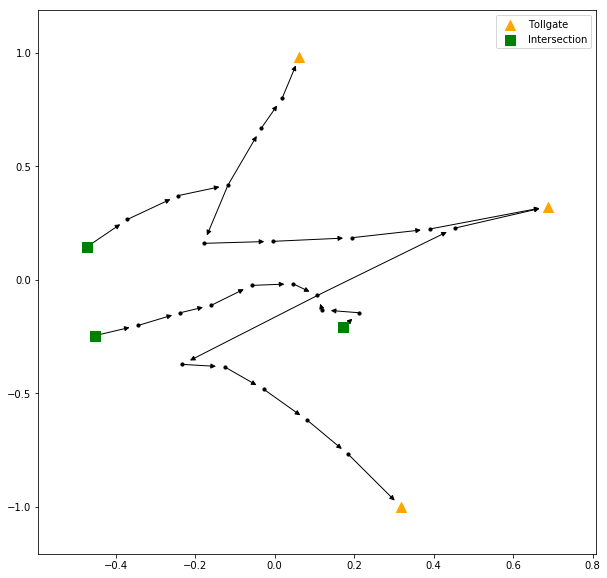

In [172]:
plt.figure(figsize=(10,10))

randomseed = 4
pos = nx.spring_layout(Links, k=0.15, seed = randomseed)
begin_end_nodes_size = 100
other_nodes_size = 10
nx.draw_networkx_nodes(Links, nodelist = end_nodes, node_shape = '^', node_color = 'orange', node_size = begin_end_nodes_size, pos=pos, with_labels = False, label = 'Tollgate')
nx.draw_networkx_nodes(Links, nodelist = start_nodes, node_shape = 's', node_color = 'green', node_size = begin_end_nodes_size, pos=pos, with_labels = False, label = 'Intersection')
nx.draw_networkx_nodes(Links, nodelist = other_nodes, node_shape = 'o', node_color = 'black', node_size = other_nodes_size, pos=pos, with_labels = False)

nx.draw_networkx_edges(Links, pos=pos, with_labels = False)


plt.legend()
# nx.draw_networkx(Links, nodelist = nodes_to_show, node_size = 10, pos=nx.spring_layout(Links, k=0.15), with_labels = False)

In [173]:
pos

{'111e_103s': array([ 0.10777516, -0.06919949]),
 '122e_3': array([0.68768541, 0.3224756 ]),
 '108e_119s': array([-0.17854403,  0.16047248]),
 '116e_101s': array([-0.12564268, -0.38389386]),
 '108e_120s': array([-0.03387872,  0.66685147]),
 '113e_1': array([ 0.31763516, -1.        ]),
 '117e_2': array([0.06187725, 0.98024508]),
 '118e_122s': array([0.38967628, 0.22344777]),
 '114e_118s': array([0.19416513, 0.18528008]),
 'A_110s': array([-0.47199921,  0.14479469]),
 '100e_111s': array([ 0.11966427, -0.13262675]),
 '110e_123s': array([-0.36997219,  0.26603233]),
 '101e_121s': array([-0.02647056, -0.48351124]),
 '123e_107s': array([-0.24211708,  0.37099442]),
 '115e_102s': array([-0.34331474, -0.20150692]),
 '106e_113s': array([ 0.18590614, -0.77022596]),
 '109e_104s': array([-0.15888683, -0.11243271]),
 '104e_112s': array([-0.05779861, -0.02489052]),
 '105e_100s': array([ 0.21145089, -0.14527293]),
 '112e_111s': array([ 0.04652193, -0.01774568]),
 '121e_106s': array([ 0.08252575, -0.619

In [174]:
Links.edges

OutEdgeView([('111e_103s', '103e_116s'), ('111e_103s', '103e_122s'), ('108e_119s', '119e_114s'), ('116e_101s', '101e_121s'), ('108e_120s', '120e_117s'), ('118e_122s', '122e_3'), ('114e_118s', '118e_122s'), ('A_110s', '110e_123s'), ('100e_111s', '111e_103s'), ('110e_123s', '123e_107s'), ('101e_121s', '121e_106s'), ('123e_107s', '107e_108s'), ('115e_102s', '102e_109s'), ('106e_113s', '113e_1'), ('109e_104s', '104e_112s'), ('104e_112s', '112e_111s'), ('105e_100s', '100e_111s'), ('112e_111s', '111e_103s'), ('121e_106s', '106e_113s'), ('B_105s', '105e_100s'), ('103e_122s', '122e_3'), ('102e_109s', '109e_104s'), ('120e_117s', '117e_2'), ('C_115s', '115e_102s'), ('103e_116s', '116e_101s'), ('107e_108s', '108e_120s'), ('107e_108s', '108e_119s'), ('119e_114s', '114e_118s')])

In [175]:
links

,link_id,length,width,lanes,in_top,out_top,lane_width
0,100,58,3,1,105,111,3
1,101,84,3,1,116,121,3
2,102,131,9,3,115,109,3
3,103,23,12,4,111,"122,116",3
4,104,293,9,3,109,112,3
5,105,78,6,2,NaN,100,3
6,106,15,3,1,121,113,3
7,107,34,9,3,123,108,3
8,108,40,9,3,107,"119,120",3
9,109,135,9,3,102,104,3


In [187]:
np.linalg.norm([0.68768541, 0.3224756 ])

0.7595404766845728

In [230]:
def normalize_vector(vector):
    '''
    Normalize an input vector and
    return the corresponding unit vector
    '''
    norm = np.linalg.norm(vector)
    unit_vector = np.array(vector/norm)
    length = np.sqrt((unit_vector**2).sum()) #saved for testing
   
    return unit_vector

def get_vector(edge, pos):
    '''
    Find the vector representation of the edge
    pos: a dict storing the cooridinates keyed by nodes
    '''
    start_coord = pos[edge[0]]
    end_coord = pos[edge[1]]
    return start_coord - end_coord

def search_link(edge):
    '''
    Given an edge from the traffic graph,
    return the corresponding link_id
    '''
    start_node_id = edge[0].split('_')[1][:3]
    end_node_id = edge[1].split('_')[0][:3]
    if start_node_id == end_node_id:
        return int(start_node_id)
    else:
        print("Something wrong!!")

In [244]:
# store unit vector of links, keyed by link_id
uv_dict = dict()
for edge in Links.edges:
    link_id = search_link(edge)
    uv_dict[link_id] = normalize_vector(get_vector(edge, pos))

# add the unit vector column to links dataframe
links['unit_vector'] = links.link_id.apply(lambda x: uv_dict[x])
links['true_vector'] = links.length * links.unit_vector

tv_dict = dict(zip(links.link_id, links.true_vector))
tv_dict

{100: array([57.45721549, -7.91633681]),
 101: array([-59.26377869,  59.52986255]),
 102: array([-115.83940331,  -61.17379047]),
 103: array([-17.44114572, -14.99354648]),
 104: array([-221.49019181, -191.81004909]),
 105: array([-40.1167424 , -66.89280215]),
 106: array([-8.48140121, 12.37197775]),
 107: array([-31.87958036, -11.81915209]),
 108: array([ 9.29697474, 38.90457892]),
 109: array([-124.40946611,  -52.41454704]),
 110: array([-70.18348932, -83.3983083 ]),
 111: array([-92.64947484,  77.82721126]),
 112: array([-198.53490364,  -13.59750119]),
 113: array([-71.61999811, 124.92628175]),
 114: array([-197.36270227,  -15.87336618]),
 115: array([-98.871243  , -40.90815697]),
 116: array([-179.06760598,   18.29733559]),
 117: array([ -31.41944098, -132.32089302]),
 118: array([-202.18333386,  -39.47023573]),
 119: array([-8.98840496, -0.4567015 ]),
 120: array([-2.21967708, -5.57431912]),
 121: array([-73.82417235,  92.05428603]),
 122: array([-182.60016642,  -73.93361363]),
 12

In [243]:
links[['link_id', 'length', 'true_vector']]

,link_id,length,true_vector
0,100,58,"[57.45721548725845, -7.916336807561122]"
1,101,84,"[-59.263778688072115, 59.529862553269936]"
2,102,131,"[-115.83940331244234, -61.17379046795548]"
3,103,23,"[-17.441145716323526, -14.993546481802412]"
4,104,293,"[-221.4901918081874, -191.8100490922526]"
5,105,78,"[-40.11674240035748, -66.89280214778987]"
6,106,15,"[-8.481401213497026, 12.371977750371652]"
7,107,34,"[-31.87958036079071, -11.819152085487655]"
8,108,40,"[9.296974741534115, 38.904578916308516]"
9,109,135,"[-124.40946611309779, -52.414547040435]"


In [242]:
dict(zip(links.link_id, links.true_vector))

{100: array([57.45721549, -7.91633681]),
 101: array([-59.26377869,  59.52986255]),
 102: array([-115.83940331,  -61.17379047]),
 103: array([-17.44114572, -14.99354648]),
 104: array([-221.49019181, -191.81004909]),
 105: array([-40.1167424 , -66.89280215]),
 106: array([-8.48140121, 12.37197775]),
 107: array([-31.87958036, -11.81915209]),
 108: array([ 9.29697474, 38.90457892]),
 109: array([-124.40946611,  -52.41454704]),
 110: array([-70.18348932, -83.3983083 ]),
 111: array([-92.64947484,  77.82721126]),
 112: array([-198.53490364,  -13.59750119]),
 113: array([-71.61999811, 124.92628175]),
 114: array([-197.36270227,  -15.87336618]),
 115: array([-98.871243  , -40.90815697]),
 116: array([-179.06760598,   18.29733559]),
 117: array([ -31.41944098, -132.32089302]),
 118: array([-202.18333386,  -39.47023573]),
 119: array([-8.98840496, -0.4567015 ]),
 120: array([-2.21967708, -5.57431912]),
 121: array([-73.82417235,  92.05428603]),
 122: array([-182.60016642,  -73.93361363]),
 12

In [209]:
links.link_id

0     100
1     101
2     102
3     103
4     104
5     105
6     106
7     107
8     108
9     109
10    110
11    111
12    112
13    113
14    114
15    115
16    116
17    117
18    118
19    119
20    120
21    121
22    122
23    123
Name: link_id, dtype: int64

In [217]:
!ls dataSets/testing_phase1/trajectories\(table\ 5\)_test1.csv

trajectories(table 5)_test1.csv weather (table 7)_test1.csv
volume(table 6)_test1.csv


In [219]:
trajectories.travel_seq[0]

'105#2016-07-19 00:14:24#9.56;100#2016-07-19 00:14:34#6.75;111#2016-07-19 00:14:41#13.00;103#2016-07-19 00:14:54#7.47;122#2016-07-19 00:15:02#32.85'

In [220]:
weather

,date,hour,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation
0,2016-07-01,0,1000.4,1005.3,225.0,2.1,26.4,94.0,0.0
1,2016-07-01,3,1000.5,1005.3,187.0,2.7,29.0,76.0,0.0
2,2016-07-01,6,998.9,1003.7,212.0,2.9,31.7,67.0,0.0
3,2016-07-01,9,998.7,1003.5,244.0,2.7,31.6,59.0,0.0
4,2016-07-01,12,999.7,1004.5,222.0,1.3,29.9,68.0,0.0
5,2016-07-01,15,1000.0,1004.8,102.0,1.6,27.8,82.0,0.0
6,2016-07-01,18,998.8,1003.6,202.0,1.9,26.0,89.0,0.0
7,2016-07-01,21,1000.2,1005.0,334.0,2.2,25.5,90.0,0.0
8,2016-07-02,0,1001.6,1006.4,315.0,1.8,26.8,82.0,0.0
9,2016-07-02,3,1002.4,1007.2,46.0,3.2,30.0,70.0,0.0


In [221]:
trajectories.shape

(109244, 6)